In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge

In [734]:
yeast_emb_full = pd.read_csv('Data/yeast_emb_full.csv', sep = ',', index_col = 0)
yeast_emb_full


,gene_id,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,...,data_Turco_expression_11808,data_Turco_expression_16247,data_Turco_expression_16248,data_Turco_expression_16249,data_Turco_expression_16250,data_Turco_expression_16683,data_Turco_expression_16684,data_Turco_expression_16685,data_Turco_expression_21888,data_Turco_expression_21932
0,YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
1,YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
2,YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
3,YAL011W,0.461615,0.346667,0.416533,0.078400,0.014400,0.057600,0.030400,0.009600,0.019200,...,-0.194712,0.120081,0.120937,0.127851,0.128291,-0.982699,-0.759738,-1.283959,1.013252,0.901802
4,YAL012W,0.477567,0.386667,0.488156,0.015228,0.048223,0.040609,0.007614,0.012690,0.038071,...,0.949485,-0.020280,0.049414,-0.085650,-0.124227,0.035502,0.011022,0.071563,1.048560,1.270960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,YPR188C,0.347956,0.320000,0.402863,0.036810,0.018405,0.030675,0.030675,0.024540,0.030675,...,-0.048522,3.513607,0.120937,0.127851,0.128291,0.483933,0.393272,0.551316,-0.275476,0.028130
4433,YPR193C,0.356929,0.363333,0.412393,0.051282,0.051282,0.038462,0.012821,0.006410,0.012821,...,0.048394,0.120081,0.120937,0.127851,0.128291,-0.318765,-0.298534,-0.468282,-2.146781,-1.202395
4434,YPR194C,0.347956,0.323333,0.373242,0.037628,0.013683,0.019384,0.041049,0.017104,0.009122,...,-0.126461,0.120081,0.120937,0.127851,0.128291,0.473226,-0.067932,0.347396,-0.760956,-0.427164
4435,YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249


0.894951612364517


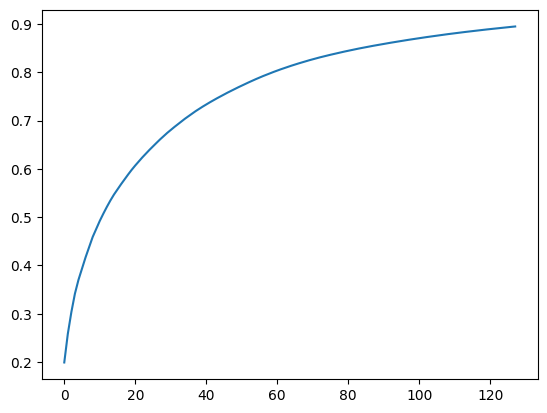

In [735]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(yeast_emb_full.iloc[:,1:])
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

we retain around 90 % variance of the data

In [736]:
dims = 128
emb_full_pca = pd.DataFrame(PCA(n_components=dims).fit_transform(yeast_emb_full.iloc[:,1:]), index=yeast_emb_full.gene_id).reset_index()
emb_full_pca

,gene_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,YAL002W,-1.278433,3.795365,-0.821618,-0.737850,0.773815,0.814555,-2.602510,-0.363664,-0.894962,...,-0.357210,-0.014524,-0.573639,0.382550,-0.446602,-0.434798,-0.019068,-0.022823,-0.277378,0.371426
1,YAL008W,-1.160772,4.700377,2.113571,-5.994945,-0.974318,0.634725,-2.661879,-0.978015,0.273590,...,-0.719833,0.413554,-0.679083,-0.260206,-0.571782,0.518910,0.216347,-0.524841,-0.205559,0.910548
2,YAL009W,-1.718576,-1.811615,-2.676558,-2.787470,-1.201407,-1.781246,0.731527,0.362199,-3.168619,...,-0.025562,0.180857,-0.234416,-0.356484,-0.024185,-0.175188,0.269913,0.172788,0.132474,0.550500
3,YAL011W,-8.343196,-2.121828,-1.300272,-2.961564,2.992992,-0.540281,-0.261664,0.709568,-0.749772,...,-0.002821,-0.527992,-0.311619,-0.116451,0.009747,-0.149887,0.441533,0.305989,-0.331908,-0.848672
4,YAL012W,15.330242,-2.268236,2.774922,3.463022,0.373932,0.887197,1.109175,2.775886,-1.385072,...,-0.274895,0.777534,-0.351652,-0.015040,1.178992,-0.358918,-0.106011,-0.014879,0.019991,-0.166328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,YPR188C,0.065339,-0.644300,-3.718469,-3.984899,-3.095681,-4.413062,-0.308836,0.048722,-2.597506,...,-0.073731,0.207591,0.370571,0.127130,-0.365692,0.057343,0.186778,-0.073952,0.402489,0.187080
4433,YPR193C,7.974786,5.494067,0.378971,-0.528844,-1.221715,-0.200250,-0.137536,1.627719,1.212257,...,0.201876,0.001555,-0.071394,-1.264268,0.095443,0.345042,0.720903,-0.600963,0.029486,0.791739
4434,YPR194C,6.251626,1.135793,-0.460277,4.364132,1.339062,-0.547333,-1.196885,-4.671899,-1.647094,...,0.017899,0.312205,0.362778,0.377362,-0.602254,0.277268,-0.130130,-0.092021,-0.281849,0.139602
4435,YPR199C,-6.707360,1.436026,-0.701099,1.032428,-0.384559,-0.538815,-0.083453,-1.698796,-0.209328,...,-0.297233,-0.254666,-0.229251,-0.613978,-0.621847,0.292757,0.462243,1.078153,-0.189800,0.148953


# Simple evaluation on single mutant fitness data

In [737]:
# Read in single mutant fitness data from Constanzo et al. 2016
smf_filter = pd.read_csv('Data/smf.csv', index_col = 0)

<Axes: >

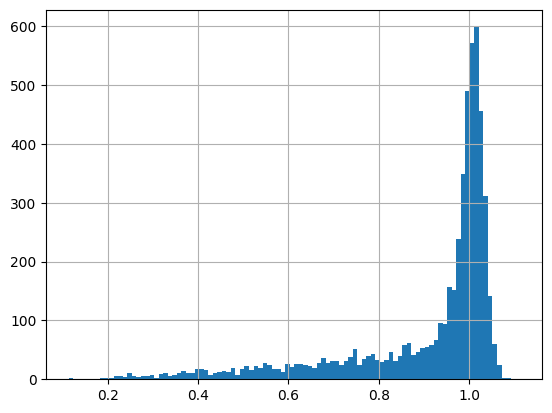

In [738]:
smf_filter.smf_30.hist(bins=100)

In [739]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2:  0.3472738894506906


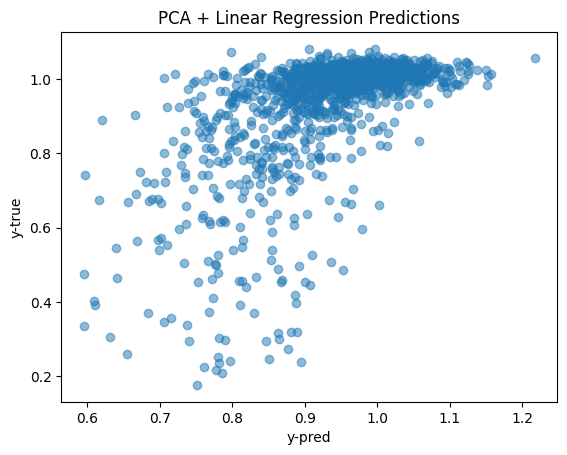

In [740]:
# How predictive are gene embeddings

A = smf_filter.merge(emb_full_pca, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
print('R2: ', lm.score(X_test, y_test))

plt.scatter(lm.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("PCA + Linear Regression Predictions")
plt.show()

R2:  0.06086055086180575


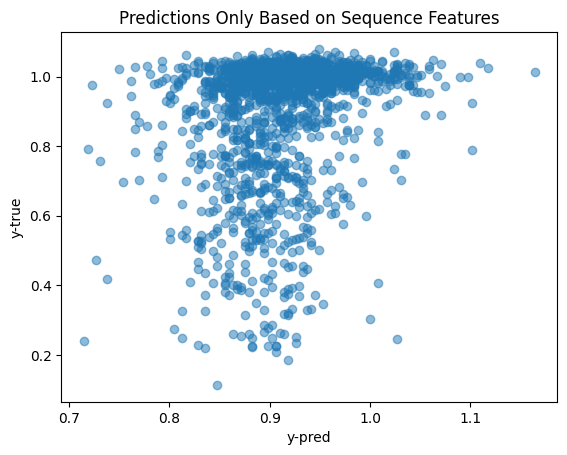

In [741]:
# Comparison to only sequence features

A = smf_filter.merge(seq_feats, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
print('R2: ', lm.score(X_test, y_test))

plt.scatter(lm.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Predictions Only Based on Sequence Features")
plt.show()

R2:  0.3579420178540502


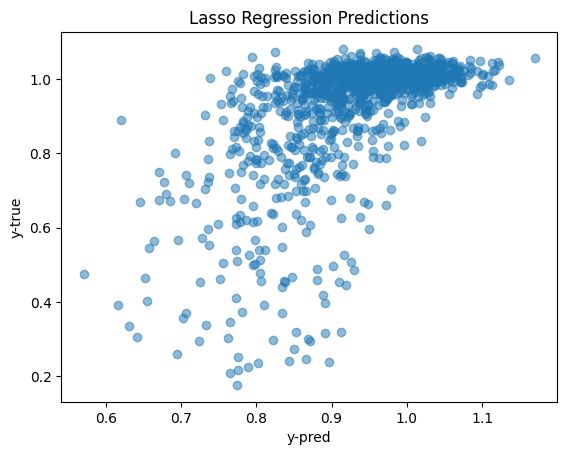

In [742]:
# use Lasso Regression (L1 Regularization) instead of PCA
A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)


print('R2: ', lasso.score(X_test, y_test))

plt.scatter(lasso.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Lasso Regression Predictions")
plt.show()

R2:  0.3613902663544598


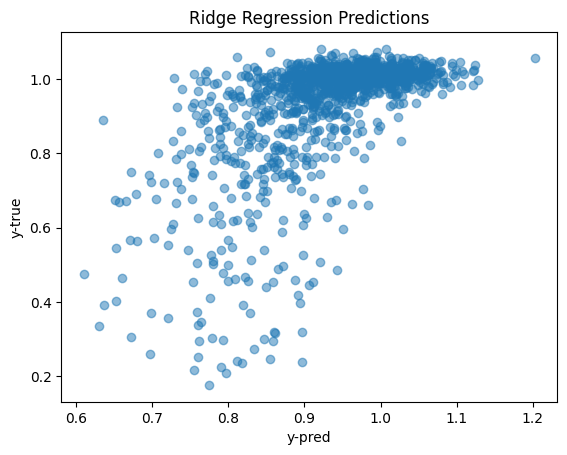

In [743]:
# use Ridge Regression (L2 Regularization) instead of PCA

A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


ridge = Ridge(alpha=500.0)
ridge.fit(X_train, y_train)


print('R2: ', ridge.score(X_test, y_test))

plt.scatter(ridge.predict(X_test), y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Ridge Regression Predictions")
plt.show()

R2: 0.4897736772483553


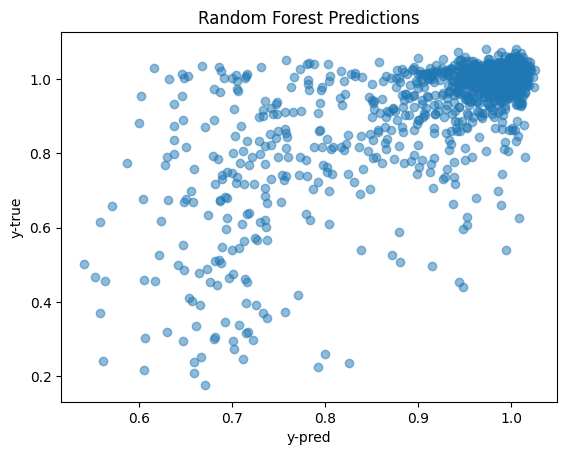

In [744]:
from sklearn.ensemble import RandomForestRegressor

A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Random Forest Predictions")
plt.show()

R2: 0.34125657503137563


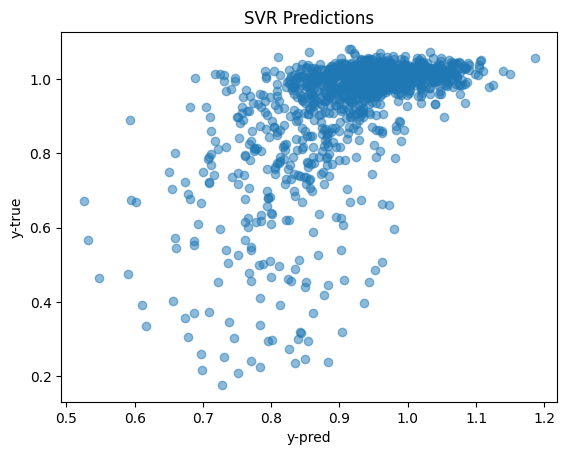

In [745]:
from sklearn.svm import SVR

A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train an SVR model
svr = SVR(kernel='rbf', C=3.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("SVR Predictions")
plt.show()

R2: 0.4585005202506459


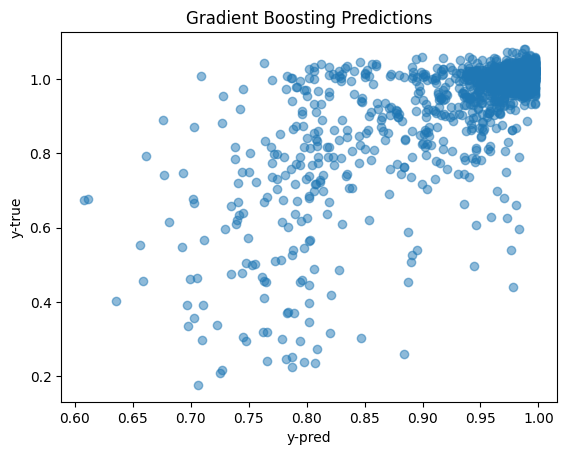

In [746]:
from sklearn.ensemble import GradientBoostingRegressor

A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gb = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Gradient Boosting Predictions")
plt.show()

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4018 - mae: 0.7195 - val_loss: 0.0158 - val_mae: 0.0867
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202 - mae: 0.0989 - val_loss: 0.0157 - val_mae: 0.0933
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - mae: 0.0875 - val_loss: 0.0144 - val_mae: 0.0844
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - mae: 0.0877 - val_loss: 0.0152 - val_mae: 0.0909
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 - mae: 0.0757 - val_loss: 0.0188 - val_mae: 0.1092
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - mae: 0.0840 - val_loss: 0.0140 - val_mae: 0.0804
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 - mae: 0.0822 - val_loss: 0.0146 - val_mae: 0.0823
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - mae: 0.0803 - val_loss: 0.0155 - val_mae: 0.0892
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161 - mae: 0.0957 - va

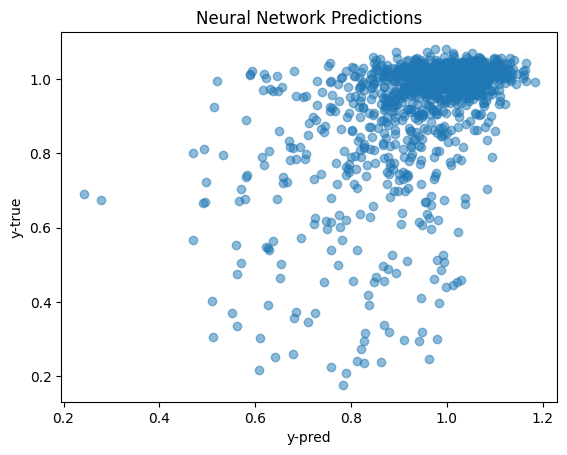

In [747]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

A = smf_filter.merge(yeast_emb_full, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred")
plt.ylabel("y-true")
plt.title("Neural Network Predictions")
plt.show()